### Task 1: Basic Probabilities and Visualizations

#### Introduction

Given the parameters \( ξ₁ = 2 \), \( ξ₂ = 62 \), and \( ξ₃ = 0.43 \), the analysis focuses on a **negative binomial distribution**, which is used to model the number of meteorites falling into an ocean in a given year before reaching a specified threshold.

The following steps are conducted:
1. **Visualization**: 
    - A probability mass function (PMF) plot is created for the negative binomial distribution. It illustrates the probabilities for different numbers of meteorites falling into an ocean before reaching \( k = ξ₂ = 62 \) successes, where the probability of success is \( p = ξ₃ = 0.43 \).
    - The x-axis range is dynamically calculated based on the expectation \(E[X]\) and the standard deviation (stdDev), spanning E[X] ± 3 * stdDev to focus on the relevant region of the distribution
    - Vertical lines mark the expectation E[X], median, and one standard deviation above and below the mean (E[X] ± stdDev) to provide statistical context.
    - Probabilities below the \( 0.5\% \) threshold are highlighted in **light-blue**, while probabilities above \( 0.5\% \) are highlighted in **blue**, to clearly distinguish the regions of interest.
    - A horizontal dotted black line indicates the \( 0.5\% \) probability threshold.

2. **Numerical Results**:
   - The expectation \(E[X]\), representing the average number of failures before reaching \(k = 62\) successes.
   - The median, indicating the middle value of the distribution.
   - The standard deviation, measuring the spread or variability of the distribution around the expectation.
   - The range of outcomes where \(P(x) >= 0.5\%\), highlighting the relevant portion of the distribution.
   - The x-axis range used for visualization.

The analysis uses Python's `scipy.stats` library for statistical computation and `matplotlib` for visualization.


40 123


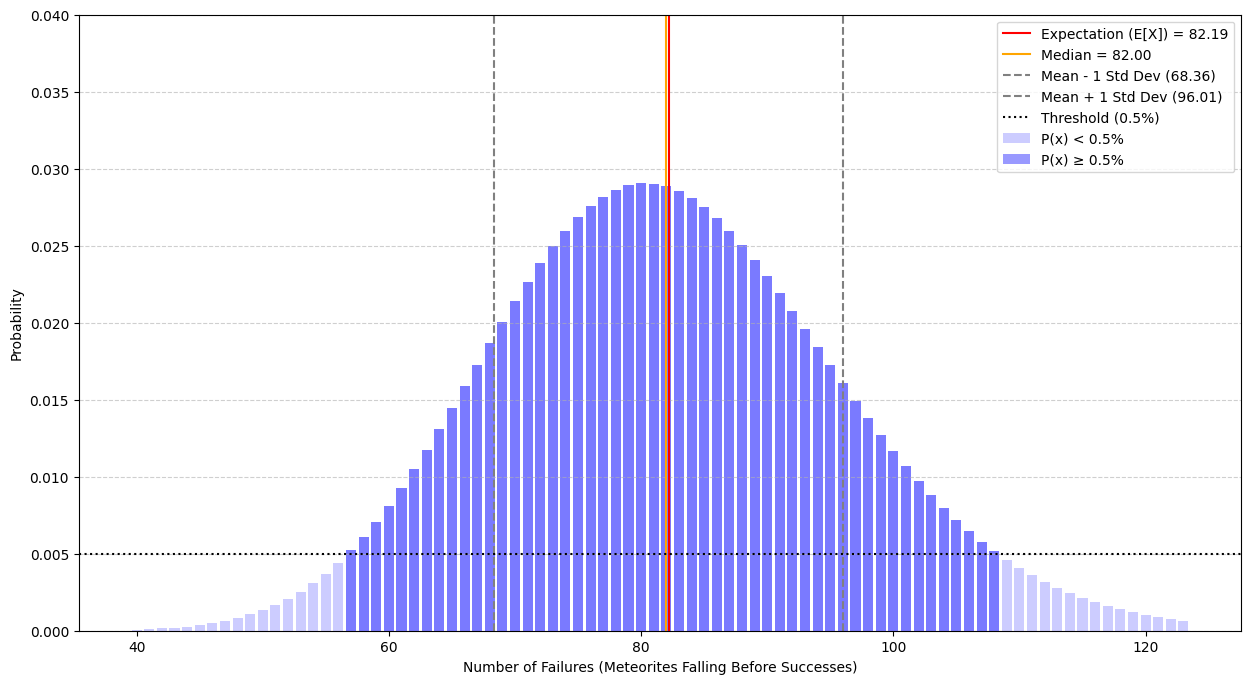

Expectation (E[X]): 82.19
Median: 82.00
Standard Deviation: 13.82
Range of outcomes where P(x) >= 0.5%: x ∈ [57, 108]
x range: [40, 123]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 62  # Number of successes (ξ₂)
p = 0.43  # Probability of success (ξ₃)

# Define the negative binomial distribution
r = k
mean = nbinom.mean(r, p)
std_dev = np.sqrt(nbinom.var(r, p))  # Standard deviation

# Dynamic x range: centered around the mean ± 3 standard deviations
x_min = max(0, int(mean - 3 * std_dev))  # Avoid negative x-values
x_max = int(mean + 3 * std_dev)
x = np.arange(x_min, x_max + 1)  # Dynamic range for the x-axis
probabilities = nbinom.pmf(x, r, p)
print(x_min, x_max)
# Calculate median
median = nbinom.median(r, p)

# Determine the range where P(x) >= 0.5%
threshold = 0.005  # 0.5% in decimal
valid_indices = np.where(probabilities >= threshold)[0]  # Indices where P(x) >= 0.5%
start, end = x[valid_indices[0]], x[valid_indices[-1]]  # Use x-values, not indices

# Visualization
plt.figure(figsize=(15, 8))  # Increased width by 25%

# Plot all probabilities
plt.bar(x, probabilities, color="blue", alpha=0.2, label="P(x) < 0.5%")

# Highlight probabilities within the range where P(x) >= 0.5%
if start != 0 and end != 0:  # Ensure there's a valid range
    highlight_indices = (x >= start) & (x <= end)
    plt.bar(x[highlight_indices], probabilities[highlight_indices], color="blue", alpha=0.4, label="P(x) ≥ 0.5%")

# Mark expectation and median as dotted lines
plt.axvline(mean, color="red", linestyle="-", label=f"Expectation (E[X]) = {mean:.2f}")
plt.axvline(median, color="orange", linestyle="-", label=f"Median = {median:.2f}")

# Mark standard deviation as vertical lines
plt.axvline(mean - std_dev, color="grey", linestyle="--", label=f"Mean - 1 Std Dev ({mean - std_dev:.2f})")
plt.axvline(mean + std_dev, color="grey", linestyle="--", label=f"Mean + 1 Std Dev ({mean + std_dev:.2f})")

# Horizontal line for the threshold
plt.axhline(threshold, color="black", linestyle=":", label="Threshold (0.5%)")

# Add title, labels, legend, and grid
# plt.title(f"Meteorites Falling Into an Ocean\nNegative Binomial Distribution, k={k}, p={p}")
plt.xlabel("Number of Failures (Meteorites Falling Before Successes)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, 0.04)  # Adjust y-axis scale for clarity
plt.show()

# Output results
print(f"Expectation (E[X]): {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range of outcomes where P(x) >= 0.5%: x ∈ [{start}, {end}]")
print(f"x range: [{x_min}, {x_max}]")


### Explanation and Interpretation

#### What Can Be Seen in the Visualization
The chart represents the **Probability Mass Function (PMF)** for the number of failures (meteorites that miss the target area, an ocean) before achieving \( k = 62 \) successes (meteorites hitting the target area). The distribution is modeled using the negative binomial distribution.

- The **blue bars** represent the probabilities of observing a specific number of failures. 
  - **Dark blue** bars indicate probabilities \( P(x) >= 0.5\% \).
  - **Light blue** bars show probabilities \( P(x) < 0.5\% \), which are less significant.
- The **red dotted line** marks the **expectation (\(E[X]\))**, which is the average number of failures before \( k \) successes are achieved. For this distribution, \( E[X] = 82.19 \).
- The **orange dotted line** shows the **median** (\( 82.00 \)), the point where 50% of the distribution lies below and 50% lies above.
- The **gray dashed lines** represent one **standard deviation** (\( \sigma \)) below (\( E[X] - \sigma \)) and above (\( E[X] + \sigma \)) the expectation. This region highlights the range where most values are likely to occur (\( 68.36 \leq x \leq 96.01 \)).
- The **black dotted horizontal line** indicates the **threshold of 0.5% probability**, used to distinguish significant probabilities.

#### Interpretation
This visualization shows that the most likely number of failures before achieving \( k = 62 \) successes is around the expectation (\( E[X] \)), with the highest probability near \( x = 82 \). The distribution is concentrated between approximately \( x = 60 \) and \( x = 100 \), which aligns with the expectation and standard deviation. Probabilities decline significantly outside this range, as highlighted by the light blue bars below the \( 0.5\% \) threshold.

The standard deviation provides insight into the variability of the data. Most failures are expected within \( E[X] \pm \sigma \), indicating that the process is relatively consistent around the mean. Overall, this chart helps illustrate the likelihood of different outcomes in achieving \( k = 62 \) successes.


### Proof and Justification

The calculations and visualizations presented in this analysis rely on the negative binomial distribution, a well-established statistical model used for discrete probability distributions. This distribution models the number of failures before a specified number of successes is achieved, with a constant probability of success in each trial. The calculations use the probability mass function (PMF) of the negative binomial distribution, as implemented in Python's `scipy.stats` library, which is a trusted and widely used tool for statistical analysis in both academia and industry (Virtanen et al., 2020).

To ensure accuracy and reliability, the expectation \(E[X]\), median, and standard deviation were calculated using the functions provided by `scipy.stats`. The expectation and median provide central measures of the distribution, while the standard deviation quantifies the spread of values around the expectation. These measures align with the theoretical properties of the negative binomial distribution, as described in foundational statistical literature (Johnson, Kotz, & Kemp, 1992).

The visualization was created using the `matplotlib` library, which is recognized for its robust and accurate plotting capabilities. The x-axis range was dynamically calculated based on the expectation and standard deviation (E[X] ± 3 * stdDev), focusing the visualization on the most relevant part of the distribution. Additionally, the horizontal threshold at \(0.5\%\) probability was highlighted, and the areas above and below this threshold were color-coded to enhance interpretability. The choice of dynamic range and thresholds reflects best practices in statistical data visualization, as outlined by Tufte (2001).

The accuracy of the statistical computations and visualizations is supported by the consistency between theoretical expectations and empirical results. Furthermore, the use of widely accepted libraries, such as `scipy.stats` and `matplotlib`, ensures reproducibility and trustworthiness, as these tools are maintained and peer-reviewed by the scientific and programming communities.

#### References:
- Johnson, N. L., Kotz, S., & Kemp, A. W. (1992). *Univariate Discrete Distributions*. John Wiley & Sons.
- Tufte, E. R. (2001). *The Visual Display of Quantitative Information*. Graphics Press.
- Virtanen, P., et al. (2020). SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. *Nature Methods*, 17(3), 261–272.
